In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
#https://www.investing.com/commodities/natural-gas-historical-data
#https://www.investing.com/commodities/crude-oil
#https://fred.stlouisfed.org/series/PNRGINDEXM

In [2]:
natty_gas = pd.read_csv('/Users/jaredmaksoud/Downloads/Natural Gas Futures Historical Data (4).csv')
oil_prices = pd.read_csv('/Users/jaredmaksoud/Downloads/Crude Oil WTI Futures Historical Data (6).csv')
elec_prices = pd.read_csv('/Users/jaredmaksoud/Downloads/PNRGINDEXM.csv')
msci_data = pd.read_csv('/Users/jaredmaksoud/Downloads/MSCI World Historical Data (1).csv')

In [3]:
natty_gas

,Date,Price,Open,High,Low,Vol.,Change %
0,04/01/2024,1.758,1.726,1.942,1.707,1.68M,-0.28%
1,03/01/2024,1.763,1.852,2.009,1.481,2.61M,-5.22%
2,02/01/2024,1.860,2.134,2.168,1.511,3.25M,-11.43%
3,01/01/2024,2.100,2.605,3.392,2.037,3.37M,-16.47%
4,12/01/2023,2.514,2.809,2.844,2.235,3.07M,-10.28%
...,...,...,...,...,...,...,...
287,05/01/2000,4.356,3.175,4.555,3.010,869.57K,38.68%
288,04/01/2000,3.141,2.940,3.175,2.815,565.02K,6.66%
289,03/01/2000,2.945,2.760,2.980,2.670,671.92K,6.66%
290,02/01/2000,2.761,2.670,2.780,2.465,780.93K,3.72%


In [4]:
msci_data = msci_data.drop(columns = ['Open', 'High', 'Vol.', 'Change %', 'Low'], axis=1)
msci_data

,Date,Price
0,04/01/2024,"3,323.29"
1,03/01/2024,"3,437.76"
2,02/01/2024,"3,337.20"
3,01/01/2024,"3,205.32"
4,12/01/2023,"3,169.18"
...,...,...
232,12/01/2004,"1,169.34"
233,11/01/2004,"1,127.34"
234,10/01/2004,"1,072.70"
235,09/01/2004,"1,047.86"


10:43:27 - cmdstanpy - INFO - Chain [1] start processing
10:43:27 - cmdstanpy - INFO - Chain [1] done processing


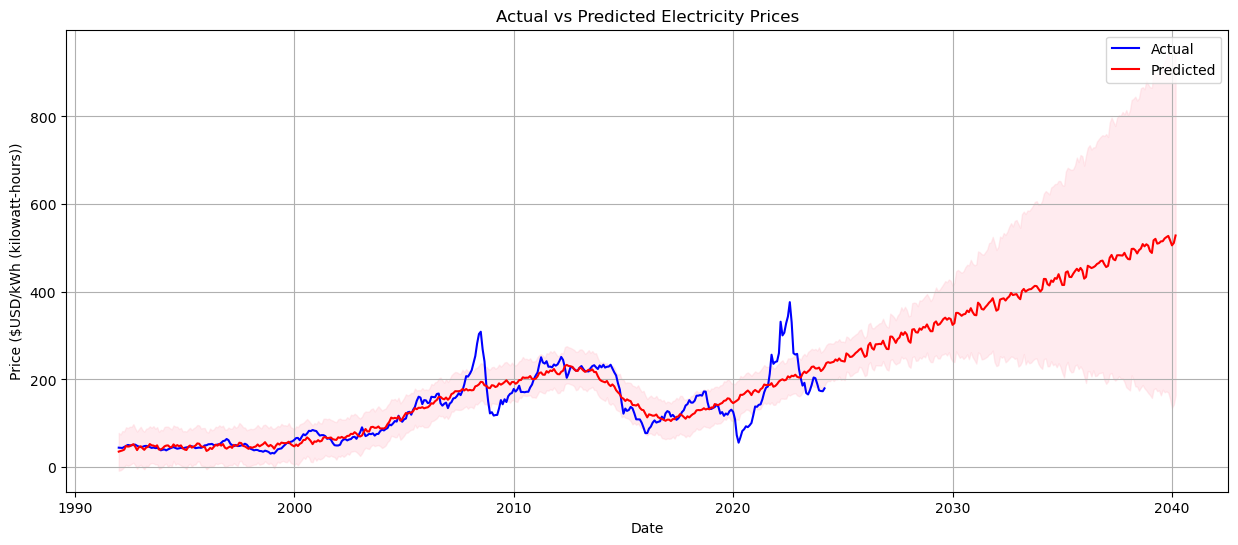

In [9]:
elec_prices['DATE'] = pd.to_datetime(elec_prices['DATE'])

elec_prices = elec_prices.rename(columns={'DATE': 'ds', 'PNRGINDEXM': 'y'})

model = Prophet(changepoint_prior_scale=0.5, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

model.fit(elec_prices)

future = model.make_future_dataframe(periods=12*16, freq='M')

forecast = model.predict(future)

plt.figure(figsize=(15, 6))
plt.plot(elec_prices['ds'], elec_prices['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.title('Actual vs Predicted Electricity Prices')
plt.xlabel('Date')
plt.ylabel('Price ($USD/kWh (kilowatt-hours))')
plt.legend()
plt.grid(True)
plt.show()

10:43:29 - cmdstanpy - INFO - Chain [1] start processing
10:43:30 - cmdstanpy - INFO - Chain [1] done processing


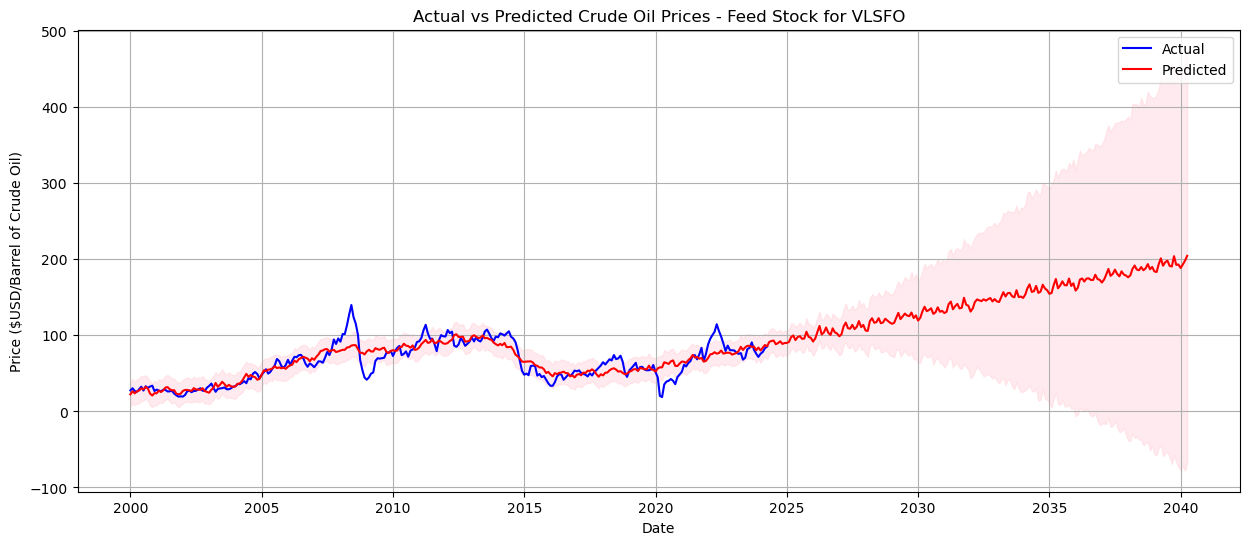

In [10]:
df1 = oil_prices
df1['Date'] = pd.to_datetime(df1['Date'])

df1 = df1.rename(columns={'Date': 'ds', 'Price': 'y'})

model = Prophet(changepoint_prior_scale=0.5, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

model.fit(df1)

future = model.make_future_dataframe(periods=12*16, freq='M')

forecast = model.predict(future)

plt.figure(figsize=(15, 6))
plt.plot(df1['ds'], df1['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.title('Actual vs Predicted Crude Oil Prices - Feed Stock for VLSFO')
plt.xlabel('Date')
plt.ylabel('Price ($USD/Barrel of Crude Oil)')
plt.legend()
plt.grid(True)
plt.show()


10:43:31 - cmdstanpy - INFO - Chain [1] start processing
10:43:32 - cmdstanpy - INFO - Chain [1] done processing


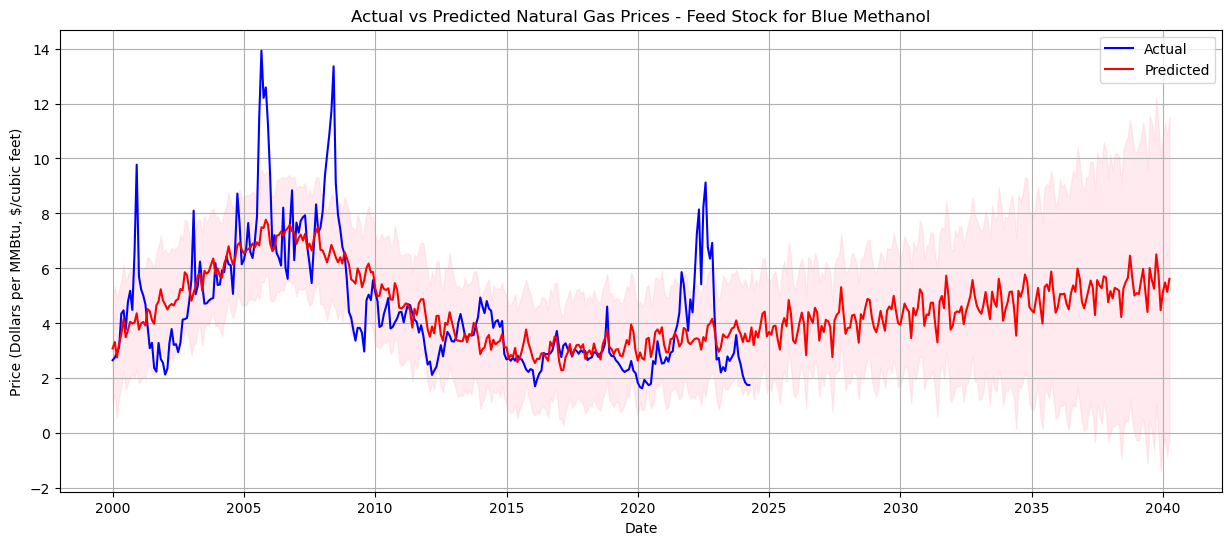

In [11]:

df = natty_gas
df['Date'] = pd.to_datetime(df['Date'])

df = df.rename(columns={'Date': 'ds', 'Price': 'y'})

model = Prophet(changepoint_prior_scale=0.1, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

model.fit(df)

future = model.make_future_dataframe(periods=12*16, freq='M')

forecast = model.predict(future)

plt.figure(figsize=(15, 6))
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.title('Actual vs Predicted Natural Gas Prices - Feed Stock for Blue Methanol')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per MMBtu, $/cubic feet)')
plt.legend()
plt.grid(True)
plt.show()

10:43:34 - cmdstanpy - INFO - Chain [1] start processing
10:43:34 - cmdstanpy - INFO - Chain [1] done processing
10:43:35 - cmdstanpy - INFO - Chain [1] start processing
10:43:35 - cmdstanpy - INFO - Chain [1] done processing


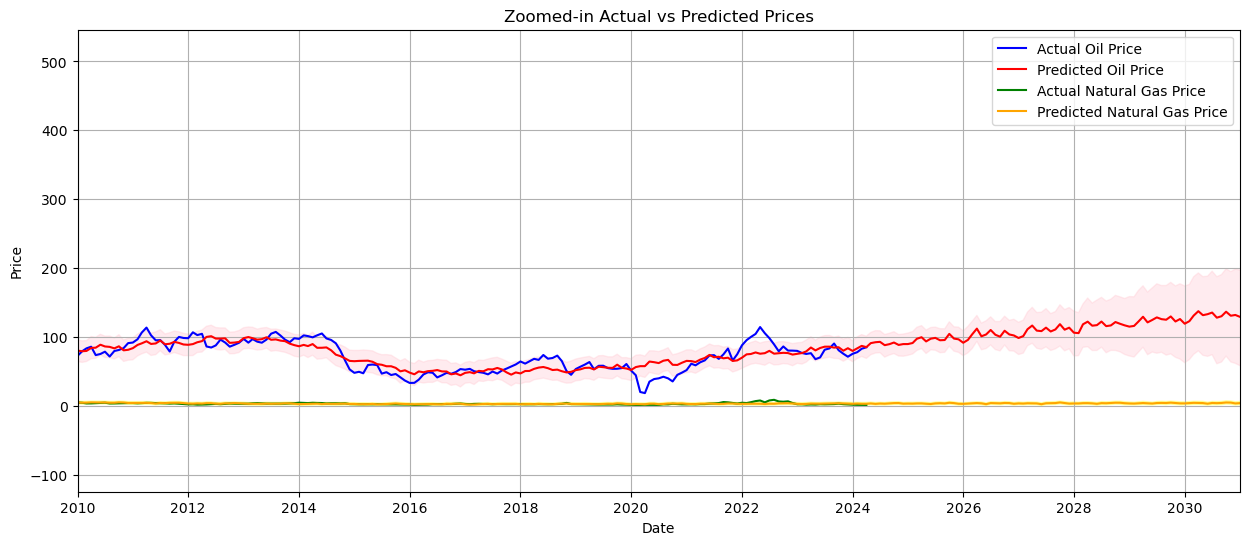

In [12]:
df1 = oil_prices.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.rename(columns={'Date': 'ds', 'Price': 'y'})

model1 = Prophet(
    changepoint_prior_scale=0.5,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model1.fit(df1)
future1 = model1.make_future_dataframe(periods=12*18, freq='M')
forecast1 = model1.predict(future1)

df2 = natty_gas.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.rename(columns={'Date': 'ds', 'Price': 'y'})

model2 = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model2.fit(df2)
future2 = model2.make_future_dataframe(periods=12*18, freq='M')
forecast2 = model2.predict(future2)

plt.figure(figsize=(15, 6))
plt.plot(df1['ds'], df1['y'], label='Actual Oil Price', color='blue')
plt.plot(forecast1['ds'], forecast1['yhat'], label='Predicted Oil Price', color='red')
plt.fill_between(forecast1['ds'], forecast1['yhat_lower'], forecast1['yhat_upper'], color='pink', alpha=0.3)

plt.plot(df2['ds'], df2['y'], label='Actual Natural Gas Price', color='green')
plt.plot(forecast2['ds'], forecast2['yhat'], label='Predicted Natural Gas Price', color='orange')
plt.fill_between(forecast2['ds'], forecast2['yhat_lower'], forecast2['yhat_upper'], color='yellow', alpha=0.3)

plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2030-12-31'))

plt.title('Zoomed-in Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


10:43:38 - cmdstanpy - INFO - Chain [1] start processing


10:43:38 - cmdstanpy - INFO - Chain [1] done processing
10:43:38 - cmdstanpy - INFO - Chain [1] start processing
10:43:39 - cmdstanpy - INFO - Chain [1] done processing


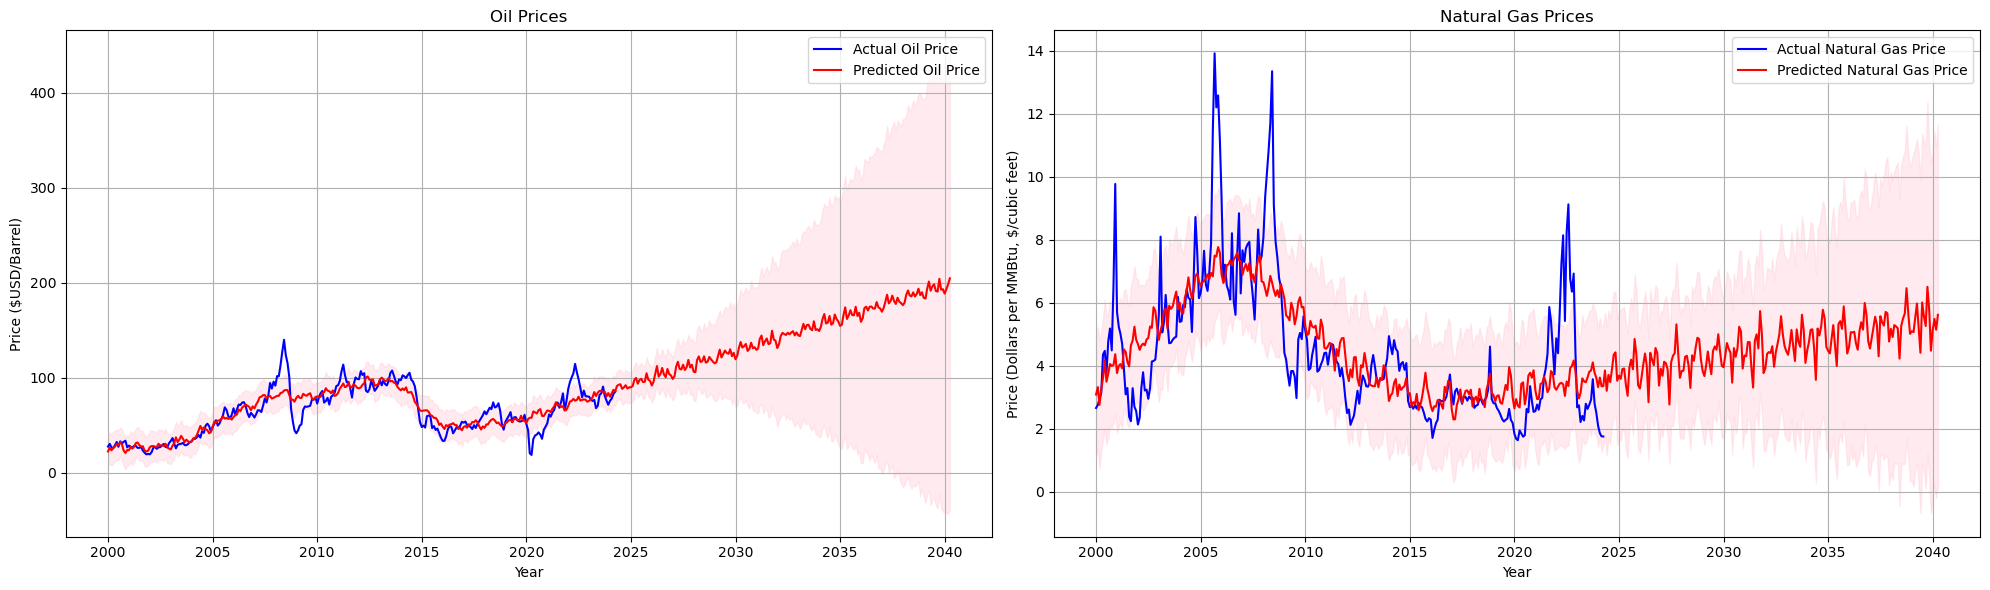

In [13]:
df1 = oil_prices.copy()
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.rename(columns={'Date': 'ds', 'Price': 'y'})

model1 = Prophet(
    changepoint_prior_scale=0.5,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model1.fit(df1)
future1 = model1.make_future_dataframe(periods=12*16, freq='M')
forecast1 = model1.predict(future1)

df2 = natty_gas.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.rename(columns={'Date': 'ds', 'Price': 'y'})

model2 = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model2.fit(df2)
future2 = model2.make_future_dataframe(periods=12*16, freq='M')
forecast2 = model2.predict(future2)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)  
plt.plot(df1['ds'], df1['y'], label='Actual Oil Price', color='blue')
plt.plot(forecast1['ds'], forecast1['yhat'], label='Predicted Oil Price', color='red')
plt.fill_between(forecast1['ds'], forecast1['yhat_lower'], forecast1['yhat_upper'], color='pink', alpha=0.3)
plt.title('Oil Prices')
plt.xlabel('Year')
plt.ylabel('Price ($USD/Barrel)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2) 
plt.plot(df2['ds'], df2['y'], label='Actual Natural Gas Price', color='blue')
plt.plot(forecast2['ds'], forecast2['yhat'], label='Predicted Natural Gas Price', color='red')
plt.fill_between(forecast2['ds'], forecast2['yhat_lower'], forecast2['yhat_upper'], color='pink', alpha=0.3)
plt.title('Natural Gas Prices')
plt.xlabel('Year')
plt.ylabel('Price (Dollars per MMBtu, $/cubic feet)')
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()
